# Farm Household Models

### The Chayanovian Household

A self-sufficient farm household $i$ with land and labor endowment $(\bar T_i, \bar L_i )$ is completely cut off from product and factor markets.  It allocates labor maximizes utility over consumption and leisure

$$\max_{c_i,l_i} U(c_i,l_i)$$

subject to the constraints that consumption $c_i$ not exceed output and the sum of hours in production $L_i$ plus hours in leisure $l_i$ not exceed the household's labor endowment $\bar L_i$

$$c_i \leq F(\bar T_i, L_i) $$
$$L_i + l_i \leq \bar L_i$$

Substituting the constraints into the objective reduces the problem to one of choosing the right allocation of labor to production:

$$\max_{L_i} U(F(\bar T_i, L_i),\bar L_i - L_i)$$

From the first order necessary conditions we obtain

$$U_c \cdot F_L = U_l$$

which states that the farm household should allocated labor to farm production up to the point where the marginal utility benefit of additional consumption $U_c \cdot F_L$ equals the opportunity cost of leisure.   

It will be useful to draw things in leisure-consumption space.  Leisure is measured on the horizontal from left to right which then means that labor $L$ allocated to production can be measured from right to left with an origin starting at the endowment point $\bar L_i$

To fix ideas with a concrete example assume farm household $i$ has Cobb-Douglas preferences over consumption and leisure:
$$U(c,l) = c^\beta l^{1-\beta}$$

and its production technology is a simple constant returns to scale Cobb-Douglas production function of the form:

$$F(\bar T_i,L_i)=\bar T_i^\alpha L_i^{1-\alpha}$$

The marginal product of labor $F_L$ which the literature frequently refers to as the shadow price of labor will be given by:

$$F_L (\bar T_i,L_i) = (1-\alpha) \left [ {\frac{\bar T_i}{L_i}} \right ]^\alpha$$

The first order necessary condition can therefore be solved for and for these Cobb-Douglas forms we get a rather simple and tidy solution to the optimal choice of leisure

$$l^* = \frac{a \cdot \bar L}{1+a} $$  

where $a=\frac{1-\beta}{\beta \cdot (1-\alpha)}$

### Graphical analysis
(Note: formulas and plots work for default parameters but not checked for other values.)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

In [2]:
ALPHA = 0.5
BETA = 0.5
TBAR = 100
LBAR = 100

def F(T,L,alpha=ALPHA):
    return (T**alpha)*(L**(1-alpha))

def FL(T,L,alpha=ALPHA):
    """Shadow price of labor"""
    return (1-alpha)*F(T,L,alpha=ALPHA)/L

def U(c, l, beta=BETA):
    return (c**beta)*(l**(1-beta))

def indif(l, ubar, beta=BETA):
    return ( ubar/(l**(1-beta)) )**(1/beta)

def leisure(Lbar,alpha=ALPHA, beta=BETA):
    a = (1-alpha)*beta/(1-beta)
    return Lbar/(1+a)

def HH(Tbar,Lbar,alpha=ALPHA, beta=BETA):
    """Household optimum leisure, consumption and utility"""
    a = (1-alpha)*beta/(1-beta)
    leisure = Lbar/(1+a)
    output = F(Tbar,Lbar-leisure, alpha)
    utility = U(output, leisure, beta)
    return leisure, output, utility 

In [3]:
U(57.74, 66.67)

62.04454689978806

In [4]:
def chayanov(Tbar,Lbar,alpha=ALPHA, beta=BETA):
    leis = np.linspace(0.1,Lbar,num=100)
    q = F(Tbar,Lbar-leis,alpha)
    l_opt, Q, U = HH(Tbar, Lbar, alpha, beta)
    print("Leisure, Consumption, Utility =({:5.2f},{:5.2f},{:5.2f})"
          .format(l_opt, Q, U))
    print("shadow price labor:{:5.2f}".format(FL(Tbar,Lbar-l_opt,beta)))
    c = indif(leis,U,beta)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(leis, q, lw=2.5)
    ax.plot(leis, c, lw=2.5)
    ax.plot(l_opt,Q,'ob')
    ax.vlines(l_opt,0,Q, linestyles="dashed")
    ax.hlines(Q,0,l_opt, linestyles="dashed")
    ax.set_xlim(0, 110)
    ax.set_ylim(0, 150)
    ax.set_xlabel(r'$l - leisure$', fontsize=16)
    ax.set_ylabel('$c - consumption$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    ax.set_title("Chayanovian Household Optimum")
    plt.show()

Leisure, Consumption, Utility =(66.67,57.74,62.04)
shadow price labor: 0.87


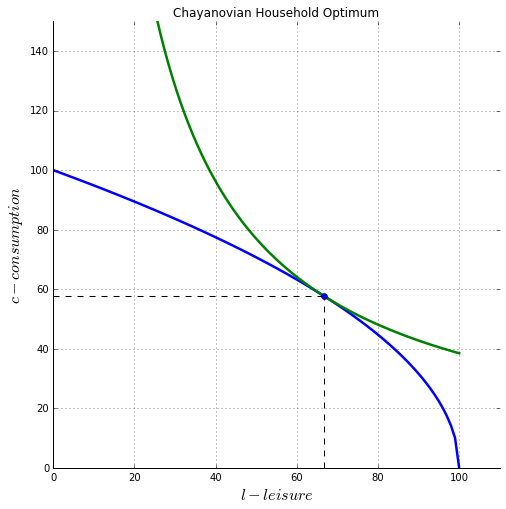

In [5]:
chayanov(TBAR,LBAR,0.5,0.5)

### Inverse farm size productivity relationship
In this non-separable household with no market for land or labor, each household farms as much land as it owns. We find the well-known inverse farm size-productivity relationship: output per hectare is higher on smaller farms.  Households with larger farms enjoy higher marginal products of labor -- a higher shadow price of labor.

These two relationships can be seen below on this two-axis plot.

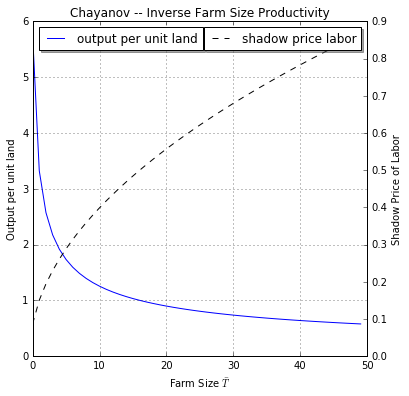

In [6]:
Tb = np.linspace(1,LBAR)
le, q, _ = HH(Tb,LBAR)
fig, ax1 = plt.subplots(figsize=(6,6))
ax1.plot(q/Tb,label='output per unit land')
ax1.set_title("Chayanov -- Inverse Farm Size Productivity")
ax1.set_xlabel('Farm Size '+r'$\bar T$')
ax1.set_ylabel('Output per unit land')
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(FL(Tb,LBAR-le),'k--',label='shadow price labor')
ax2.set_ylabel('Shadow Price of Labor')
legend = ax1.legend(loc='upper left', shadow=True)
legend = ax2.legend(loc='upper right', shadow=True)
plt.show()

If you are running this notebook in interactive mode you can play with the sliders:

Leisure, Consumption, Utility =(41.33,50.83,45.83)
shadow price labor: 1.23


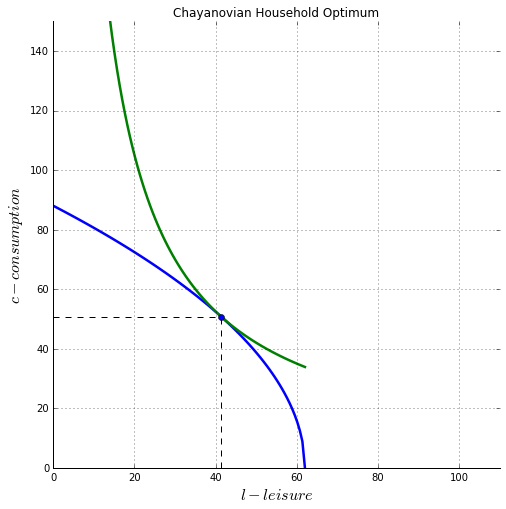

<function __main__.chayanov>

In [7]:
interact(chayanov,Tbar=(50,200,1),Lbar=(24,100,1),alpha=(0.1,0.9,0.1),beta=(0.1,0.9,0.1))

## The Separable Farm Household

Consider now the case of the household that participates in markets.  It can buy and sell the consumption good at market price $p$ and buy or sell labor at market wage $w$.   Hired labor and own household labor are assumed to be perfect substitutes.

To keep the analysis a little bit simpler and fit everything on a single graph we'll assume that the market for land leases remains closed. However it is easy to show that for a linear homogenous production function this will not matter for allocative efficiency -- it will be enough to have a working competitive labor market for the marginal product of land and labor to equalize across farms. 

When the farm household is a price-taker on markets like this, farm production decisions become 'separable' from farm consumption decisions. The farm household can make its optimal decisions as a profit-maximizing farm and then separately choose between consumption and leisure subject to an income constraint.  

So the household's problem can be boiled down to:

$$\max_{c,l} U(c,l)$$
s.t.
$$p \cdot c \leq pF(\bar T_i,L^*) + w \cdot (\bar L_i - l)$$

This last constraint states that what the household spends on consumption cannot exceed the value of farm sales at a profit maximizing optimum plus wage income from labor sold to the market.   This last constraint can also be rewritten as:

$$p \cdot c + w \cdot l \leq \Pi (T_i,w,p) + w \cdot \bar L_i $$

where $\Pi (T_i,w,p) = p \cdot F(T_i,L^*_i) - w \cdot L^*_i$ is the maximized value of farm profits and $L^*_i$ is the optimal quantity of labor that achieves that maximum.  

In other words the farm household can be thought of as maximizing profits by choosing an optimal labor input into the farm $L^*_i$ which will be satisfied with own and/or hired labor.  The household then maximizes utility from consumption and leisure subject to the constraint that it not spend more on consumption and leisure as its income which is made up of farm profits (a return to land) and the market value of it's labor endowment.   

In this last description the household is thought of as buying leisure at its market wage opportunity cost.

#### The efficient competitive farm

As a production enterprise the farm acts to maximize farm profits $pF(\bar T_i,L_i) - w \cdot L_i $. The first-order necessary condition for an interior optimum is:
$$p \cdot F_L (\bar T_i,L) = w$$

For the Cobb-Douglas production function, optimal labor demand can then be solved to be:

$$ L_i^* = \bar T_i \cdot \left [ {\frac{p(1-\alpha)}{w}} \right ]^\frac{1}{\alpha}$$

Substituting this value into the profit function we can find an expression for farm profits $\Pi (T_i,w,p)$ as a function of the market product price and wage and the farm's land holding. If we had allowed for hiring on both land and labor markets we would have found zero profits with this linear homogenous technology so in this context where there is no working land market, profits are just like a competitively determined rent to non-traded land (equal in value to what the same household would have earned on its land endowment had the land market been open). 

Note how the optimal allocation of labor to the farm is independent of the size of the household $\bar L_i$ and household preferences.  If we had allowed for a competitive land market the labor allocation would also have been independent of the household's 

In what follows we shall normalize the product price $p$ to unity.  This is without loss of generality as all that matters for real allocations is the relative price of labor (or leisure) relative to output, or the real wage $\frac{w}{p}$.  So in all the expressions that follow when we see $w$ it should be thought of as $\frac{w}{p}$

In [8]:
def farm_optimum(Tbar, w, alpha=ALPHA):
    """returns optimal labor demand and profits"""
    LD = Tbar * ((1-alpha)/w)**(1/alpha)
    profit = F(Tbar, LD) - w*LD
    return LD, profit

Let's assume the market real wage starts at unity:

In [9]:
W = 1 

In [10]:
def plot_production(Tbar,Lbar,w):
    lei = np.linspace(1, Lbar)
    q = F(Tbar, Lbar-lei)
    ax.plot(lei, q, lw=2.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [11]:
def plot_farmincome(Tbar, Lbar, w):
    lei = np.linspace(1, Lbar)
    LD, profits = farm_optimum(Tbar, w)
    q_opt = F(Tbar,LD)
    yline = profits + w*Lbar - w*lei
    ax.plot(lei,yline)
    ax.plot(Lbar-LD,q_opt,'ob')
    ax.vlines(Lbar - LD,0,q_opt, linestyles="dashed")
    ax.vlines(Lbar,0,F(Tbar,Lbar))
    ax.hlines(profits,0,Lbar, linestyles="dashed")
    ax.hlines(q_opt,0,Lbar, linestyles="dashed")
    ax.text(Lbar+1,profits,r'$\Pi ^*$',fontsize=16)
    ax.text(Lbar+1,q_opt,r'$F(\bar T, L_i^{*})$',fontsize=16)
    ax.annotate('',(Lbar-LD,2),(Lbar,2),arrowprops={'arrowstyle':'<->'})
    ax.text((2*Lbar-LD)/2,4,r'$L_i^{*}$',fontsize=16)

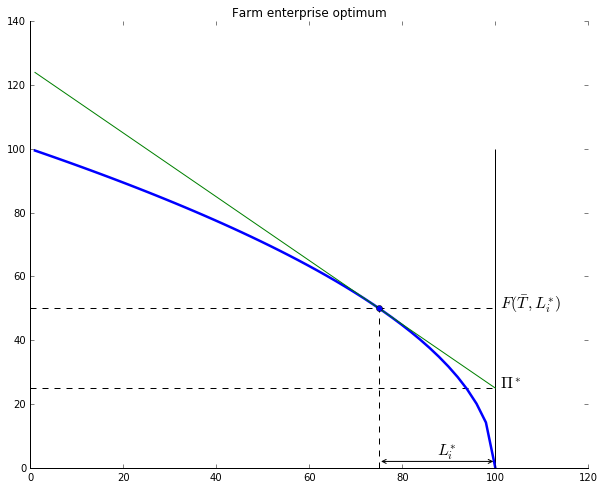

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
plot_production(TBAR,LBAR,W)
plot_farmincome(TBAR, LBAR, W)
ax.set_title("Farm enterprise optimum")
ax.set_xlim(0,LBAR+20)
plt.show()

### Still to come

 - add consumption/leisure, labor selling/hiring to diagram
 - interactive version
 - market equilibrium determination of equilibrium real wage (given distribution of farms/endowments)
 - selective separability